In [20]:
# %% 
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Загрузка данных
pred_path = Path("../data/processed/windows_pred.parquet")
df = pd.read_parquet(pred_path)
print(f"Всего окон: {len(df)}")
display(df[['episode_id','start','end','intro_score']].head(10))

Всего окон: 63849


,episode_id,start,end,intro_score
0,-220020068_456249204,0.0,3.0,0.000002
1,-220020068_456249204,0.0,6.0,0.000001
2,-220020068_456249204,0.0,9.0,0.000049
3,-220020068_456249204,3.0,6.0,0.000002
4,-220020068_456249204,3.0,9.0,0.999915
5,-220020068_456249204,3.0,12.0,0.999978
6,-220020068_456249204,6.0,9.0,0.999955
7,-220020068_456249204,6.0,12.0,0.999972
8,-220020068_456249204,6.0,15.0,0.999978
9,-220020068_456249204,9.0,12.0,0.999954


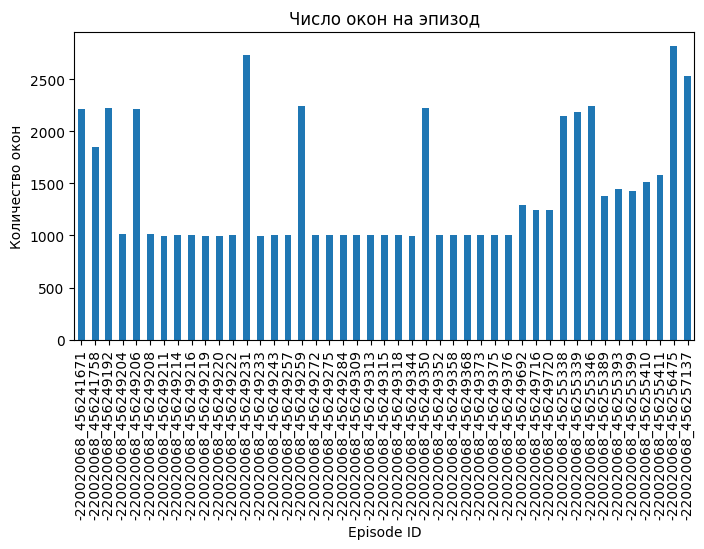

In [21]:
# %%
counts = df['episode_id'].value_counts().sort_index()
plt.figure(figsize=(8,4))
counts.plot(kind='bar')
plt.title("Число окон на эпизод")
plt.xlabel("Episode ID")
plt.ylabel("Количество окон")
plt.show()


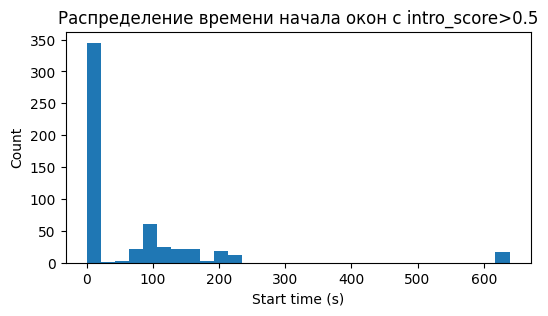

In [22]:
df_pos = df[df.intro_score > 0.5]
plt.figure(figsize=(6,3))
plt.hist(df_pos['start'], bins=30)
plt.title("Распределение времени начала окон с intro_score>0.5")
plt.xlabel("Start time (s)")
plt.ylabel("Count")
plt.show()


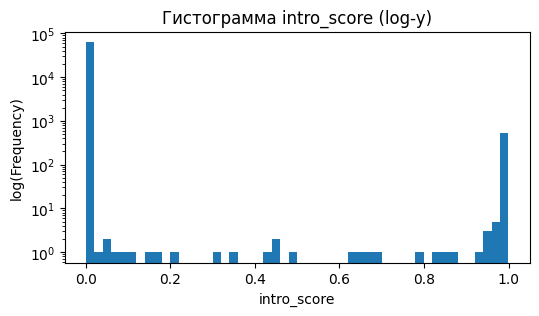

In [23]:
plt.figure(figsize=(6,3))
plt.hist(df['intro_score'], bins=50, log=True)
plt.title("Гистограмма intro_score (log‐y)")
plt.xlabel("intro_score")
plt.ylabel("log(Frequency)")
plt.show()

/var/folders/5j/cxq1m23j1k77h961fvg0f3v00000gn/T/ipykernel_12493/3191979010.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sample_eps, showfliers=False)


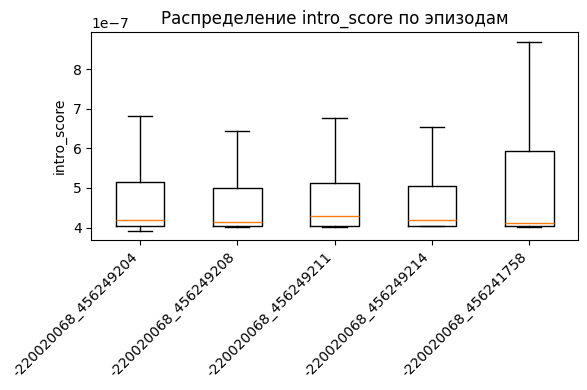

In [24]:
sample_eps = df['episode_id'].unique()[:5]
data = [df[df.episode_id==ep].intro_score for ep in sample_eps]

plt.figure(figsize=(6,4))
plt.boxplot(data, labels=sample_eps, showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title("Распределение intro_score по эпизодам")
plt.ylabel("intro_score")
plt.tight_layout()
plt.show()

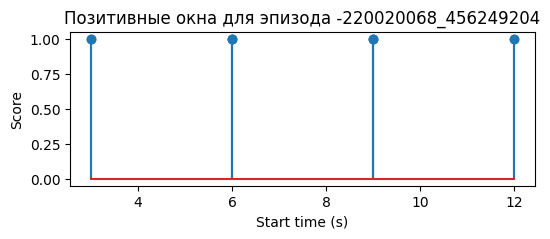

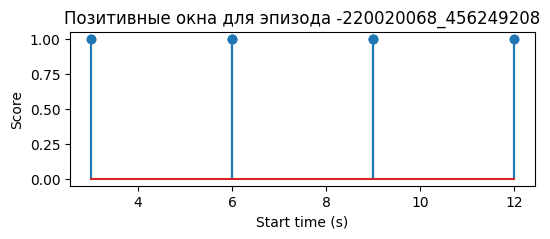

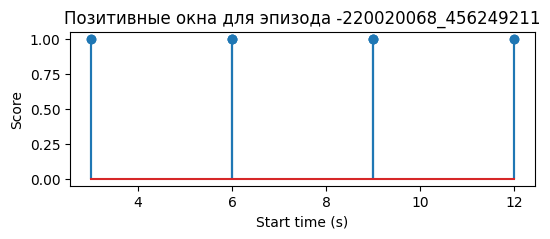

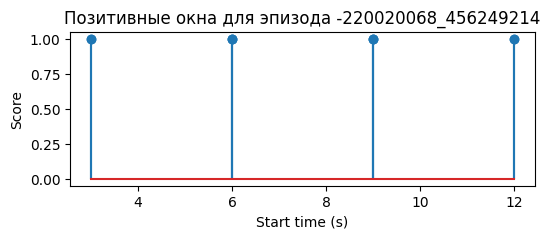

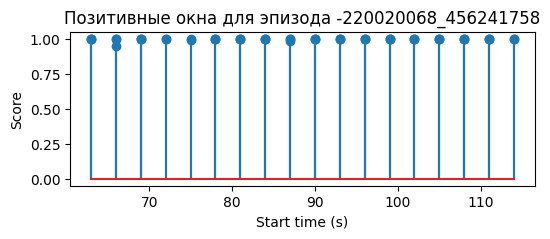

In [25]:
for ep in sample_eps:
    df_ep = df[(df.episode_id==ep) & (df.intro_score>0.5)]
    if df_ep.empty: continue
    plt.figure(figsize=(6,2))
    plt.stem(df_ep.start, df_ep.intro_score)
    plt.title(f"Позитивные окна для эпизода {ep}")
    plt.xlabel("Start time (s)")
    plt.ylabel("Score")
    plt.show()

In [30]:

# Quick summary
print(df.shape)          # rows, columns
print(df['intro_score'].describe())

# View specific episode

ep = "-220020068_456249204"
df_ep = df[df['episode_id'] == ep]
df_ep.sort_values('start').head(20)

(63849, 647)
count    6.384900e+04
mean     8.582641e-03
std      9.187530e-02
min      3.876420e-07
25%      4.032883e-07
50%      4.108092e-07
75%      4.964593e-07
max      9.999932e-01
Name: intro_score, dtype: float64


,episode_id,start,end,length,rel_start,is_intro,v0,v1,v2,v3,...,a119,a120,a121,a122,a123,a124,a125,a126,a127,intro_score
0,-220020068_456249204,0.0,3.0,3.0,0.000000,0,0.184189,0.264134,0.217835,-0.126544,...,-68.574821,-68.842674,-69.092308,-69.274452,-69.716621,-70.806320,-71.640388,-73.100258,-74.279640,2.116751e-06
1,-220020068_456249204,0.0,6.0,6.0,0.000000,0,-0.013812,0.245436,0.054364,-0.197726,...,-73.977898,-74.099266,-74.243050,-74.336327,-74.539345,-75.082024,-75.422768,-76.184006,-76.892845,1.356134e-06
2,-220020068_456249204,0.0,9.0,9.0,0.000000,0,-0.118230,0.284303,0.034876,-0.170224,...,-71.789268,-72.089462,-72.320473,-72.457520,-72.816467,-73.508530,-74.040131,-75.064896,-76.103165,4.926132e-05
3,-220020068_456249204,3.0,6.0,3.0,0.002953,0,-0.211812,0.226738,-0.109106,-0.268907,...,-79.380981,-79.355843,-79.393806,-79.398216,-79.362068,-79.357727,-79.205139,-79.267754,-79.506065,2.076908e-06
4,-220020068_456249204,3.0,9.0,6.0,0.002953,1,-0.269440,0.294388,-0.056604,-0.192064,...,-73.396492,-73.712852,-73.934563,-74.049049,-74.366386,-74.859642,-75.239998,-76.047211,-77.014938,9.999152e-01
5,-220020068_456249204,3.0,12.0,9.0,0.002953,1,-0.308425,0.182065,-0.075510,-0.108783,...,-60.499496,-60.987095,-61.219170,-61.281616,-61.735630,-62.362568,-63.227215,-64.359741,-65.897392,9.999775e-01
6,-220020068_456249204,6.0,9.0,3.0,0.005906,1,-0.327068,0.362038,-0.004102,-0.115221,...,-67.411995,-68.069862,-68.475319,-68.699890,-69.370705,-70.361549,-71.274864,-72.826668,-74.523811,9.999549e-01
7,-220020068_456249204,6.0,12.0,6.0,0.005906,1,-0.356731,0.159729,-0.058712,-0.028721,...,-51.058758,-51.802723,-52.131847,-52.223316,-52.922405,-53.864986,-55.238262,-56.905731,-59.093060,9.999718e-01
8,-220020068_456249204,6.0,15.0,9.0,0.005906,1,-0.260480,0.134000,-0.150968,-0.080007,...,-48.362225,-49.102516,-49.255402,-49.646118,-50.094128,-50.882175,-51.975563,-53.652977,-55.831795,9.999778e-01
9,-220020068_456249204,9.0,12.0,3.0,0.008858,1,-0.386394,-0.042580,-0.113323,0.057778,...,-34.705517,-35.535583,-35.788380,-35.746742,-36.474106,-37.368427,-39.201656,-40.984802,-43.662304,9.999543e-01
